In [1]:
import numpy as np
import scipy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

2024-12-26 11:05:34.049026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-26 11:05:34.633333: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
test_dir = 'FER-2013/test'  
train_dir = 'FER-2013/train'   

In [3]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    brightness_range =[0.8,1.2],
    shear_range = 0.15,
    horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(48, 48),    # FER images are typically 48x48
    batch_size=64,
    class_mode='categorical'
)

val_generator = datagen_val.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
# Load the pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Fine-tune deeper layers of the base model
for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

# Add custom top layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2024-12-26 11:05:38.529456: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11541 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:19:00.0, compute capability: 6.1
2024-12-26 11:05:38.530058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 11541 MB memory:  -> device: 1, name: NVIDIA TITAN Xp, pci bus id: 0000:1a:00.0, compute capability: 6.1
2024-12-26 11:05:38.530539: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 11541 MB memory:  -> device: 2, name: NVIDIA TITAN Xp, pci bus id: 0000:67:00.0, compute capability: 6.1
2024-12-26 11:05:38.531054: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 11533 MB memory:  -> device: 3, name: NVIDIA TITAN Xp, pci bus id: 0000:68:00.0, comp

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=500,
    callbacks=[early_stopping]
)

Epoch 1/500
449/449 [==============================] - 37s 82ms/step - loss: 1.1436 - accuracy: 0.5752 - val_loss: 1.2338 - val_accuracy: 0.5456
Epoch 2/500
449/449 [==============================] - 38s 84ms/step - loss: 1.1393 - accuracy: 0.5787 - val_loss: 1.2559 - val_accuracy: 0.5390
Epoch 3/500
449/449 [==============================] - 37s 83ms/step - loss: 1.1426 - accuracy: 0.5763 - val_loss: 1.2419 - val_accuracy: 0.5408
Epoch 4/500
449/449 [==============================] - 38s 84ms/step - loss: 1.1271 - accuracy: 0.5815 - val_loss: 1.2434 - val_accuracy: 0.5458
Epoch 8/500
449/449 [==============================] - 37s 82ms/step - loss: 1.1271 - accuracy: 0.5824 - val_loss: 1.2435 - val_accuracy: 0.5440
Epoch 9/500
449/449 [==============================] - 38s 84ms/step - loss: 1.1368 - accuracy: 0.5773 - val_loss: 1.2041 - val_accuracy: 0.5535
Epoch 10/500
449/449 [==============================] - 37s 83ms/step - loss: 1.1302 - accuracy: 0.5780 - val_loss: 1.2562 - val_a

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 [==============================] - 37s 83ms/step - loss: 1.1185 - accuracy: 0.5870 - val_loss: 1.1970 - val_accuracy: 0.5610
Epoch 21/500
449/449 [==============================] - 38s 85ms/step - loss: 1.1086 - accuracy: 0.5880 - val_loss: 1.1961 - val_accuracy: 0.5658
Epoch 22/500
449/449 [==============================] - 38s 84ms/step - loss: 1.1060 - accuracy: 0.5904 - val_loss: 1.2222 - val_accuracy: 0.5571
Epoch 23/500
449/449 [==============================] - 37s 83ms/step - loss: 1.1116 - accuracy: 0.5884 - val_loss: 1.2444 - val_accuracy: 0.5553
Epoch 24/500
449/449 [==============================] - 37s 83ms/step - loss: 1.1144 - accuracy: 0.5847 - val_loss: 1.2461 - val_accuracy: 0.5566
Epoch 25/500
449/449 [==============================] - 37s 83ms/step - loss: 1.1054 - accuracy: 0.5908 - val_loss: 1.2495 - val_accuracy: 0.5496
Epoch 26/500
449/449 [==============================] - 38s 84ms/step - loss: 1.0984 - accuracy: 0.5927 - val_loss: 1.2300 - val_accuracy

In [9]:
model.save("v2-MobileNetV2.h5")

/home/deeptimaan/.conda/envs/venv-p39-tf2/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


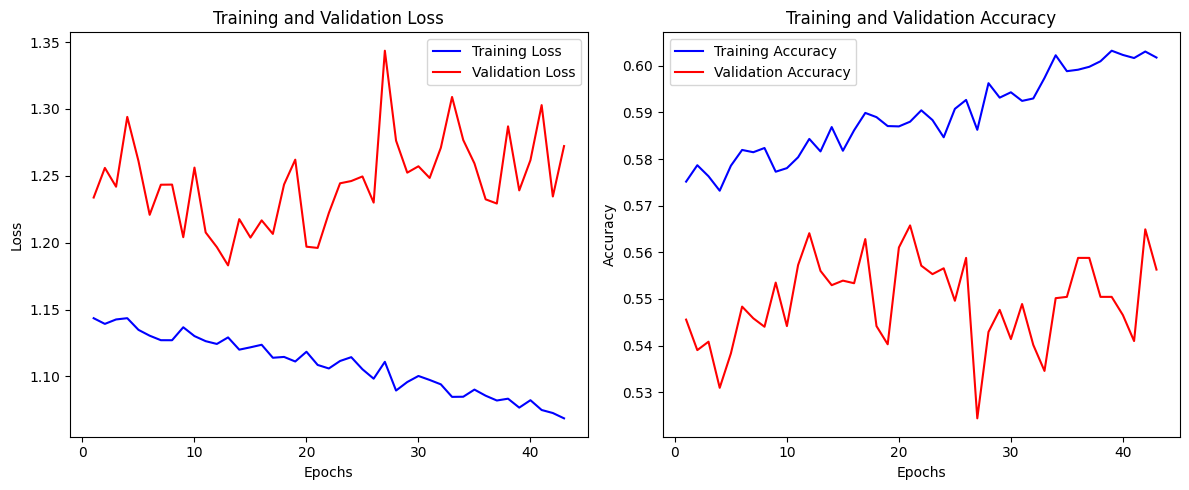

In [10]:
import matplotlib.pyplot as plt

# Extract data from history
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
